2022-07-12 <br/>
European flights <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-07-12

Smoothening timeline - Completed 


Special Thanks to xh313: https://github.com/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday12072022.ipynb <br/>

waiyanps: https://github.com/waiyanps/TidyTuesday-Python/blob/main/Art%20Collections/Art%20Collection.ipynb

In [121]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default="jupyterlab"
import os

In [122]:
df=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-07-12/flights.csv")

In [123]:
df.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
0,2016,1,JAN,2016-01-01T00:00:00Z,EBAW,Antwerp,Belgium,4,3,7,NaN,NaN,NaN,Antwerp (EBAW)
1,2016,1,JAN,2016-01-01T00:00:00Z,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0,Brussels (EBBR)
2,2016,1,JAN,2016-01-01T00:00:00Z,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0,Charleroi (EBCI)
3,2016,1,JAN,2016-01-01T00:00:00Z,EBLG,Liège,Belgium,6,7,13,NaN,NaN,NaN,Liège (EBLG)
4,2016,1,JAN,2016-01-01T00:00:00Z,EBOS,Ostend-Bruges,Belgium,7,7,14,NaN,NaN,NaN,Ostend-Bruges (EBOS)


In [124]:
df.STATE_NAME.value_counts()

France                         138694
Spain                          110164
Norway                          70174
United Kingdom                  43504
Germany                         36774
Poland                          32230
Italy                           30400
Greece                          29041
Portugal                        23795
Ireland                         16753
Austria                         13900
Türkiye                         12976
Belgium                         11672
Netherlands                     10818
Morocco                          9359
Czech Republic                   9002
Lithuania                        8964
Sweden                           7017
Switzerland                      6962
Slovenia                         6276
Romania                          4641
Cyprus                           4617
Estonia                          4368
Latvia                           3717
Croatia                          3349
Serbia                           2343
Georgia     

In [125]:
df.APT_NAME.value_counts()

Vienna                 2343
Oslo - Gardermoen      2343
Nice-Côte d’Azur       2343
Bucharest - Otopeni    2343
Tbilisi                2343
                       ... 
Valencia - Requena      456
Ciudad Real Central     366
Sligo                   223
Ventspils                52
Tukums Jurmala           23
Name: APT_NAME, Length: 333, dtype: int64

In [126]:
df["Pivot Label"].value_counts()

Vienna (LOWW)                 2343
Oslo - Gardermoen (ENGM)      2343
Nice-Côte d’Azur (LFMN)       2343
Bucharest - Otopeni (LROP)    2343
Tbilisi (UGTB)                2343
                              ... 
Valencia - Requena (LERE)      456
Ciudad Real Central (LERL)     366
Sligo (EISG)                   223
Ventspils (EVVA)                52
Tukums Jurmala (EVJA)           23
Name: Pivot Label, Length: 333, dtype: int64

In [127]:
# Filtering for specific airports
df_filtered = df[(df['Pivot Label'].isin(['Vienna (LOWW)',
                                 'Oslo - Gardermoen (ENGM)',
                                 'Nice-Côte d’Azur (LFMN) ',
                                 'Bucharest - Otopeni (LROP)',
                                 'Tbilisi (UGTB)',
                                 ]))].reset_index(drop=True)

df_filtered.head()


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
0,2016,1,JAN,2016-01-01T00:00:00Z,ENGM,Oslo - Gardermoen,Norway,177,160,337,177.0,161.0,338.0,Oslo - Gardermoen (ENGM)
1,2016,1,JAN,2016-01-01T00:00:00Z,LOWW,Vienna,Austria,210,176,386,210.0,179.0,389.0,Vienna (LOWW)
2,2016,1,JAN,2016-01-01T00:00:00Z,LROP,Bucharest - Otopeni,Romania,47,54,101,47.0,50.0,97.0,Bucharest - Otopeni (LROP)
3,2016,1,JAN,2016-01-01T00:00:00Z,UGTB,Tbilisi,Georgia,16,20,36,NaN,NaN,NaN,Tbilisi (UGTB)
4,2016,1,JAN,2016-01-02T00:00:00Z,ENGM,Oslo - Gardermoen,Norway,168,170,338,168.0,166.0,334.0,Oslo - Gardermoen (ENGM)


In [128]:
df_filtered['DATE'] = pd.to_datetime(df_filtered['FLT_DATE'])#.dt.day

In [130]:
df_filtered.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label,DATE
0,2016,1,JAN,2016-01-01T00:00:00Z,ENGM,Oslo - Gardermoen,Norway,177,160,337,177.0,161.0,338.0,Oslo - Gardermoen (ENGM),2016-01-01 00:00:00+00:00
1,2016,1,JAN,2016-01-01T00:00:00Z,LOWW,Vienna,Austria,210,176,386,210.0,179.0,389.0,Vienna (LOWW),2016-01-01 00:00:00+00:00
2,2016,1,JAN,2016-01-01T00:00:00Z,LROP,Bucharest - Otopeni,Romania,47,54,101,47.0,50.0,97.0,Bucharest - Otopeni (LROP),2016-01-01 00:00:00+00:00
3,2016,1,JAN,2016-01-01T00:00:00Z,UGTB,Tbilisi,Georgia,16,20,36,NaN,NaN,NaN,Tbilisi (UGTB),2016-01-01 00:00:00+00:00
4,2016,1,JAN,2016-01-02T00:00:00Z,ENGM,Oslo - Gardermoen,Norway,168,170,338,168.0,166.0,334.0,Oslo - Gardermoen (ENGM),2016-01-02 00:00:00+00:00


In [136]:

#import plotly.express as px
#df = px.data.gapminder()
fig = px.area(df_filtered, x="DATE", y="FLT_ARR_1",color="APT_NAME", title= "Arrival Times (Rough plot)")
fig.show()

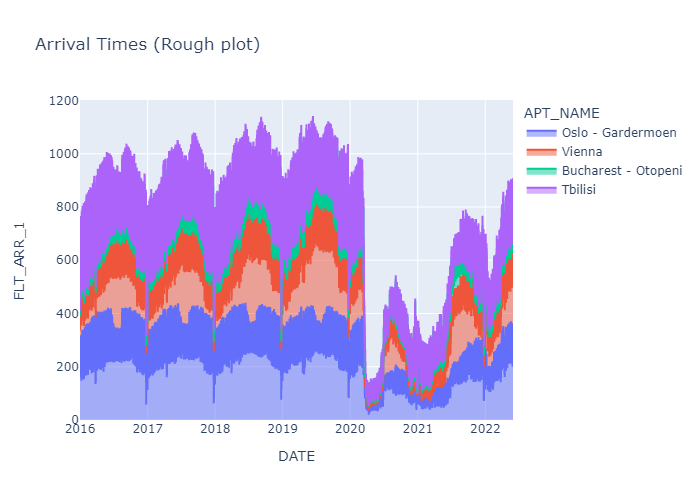

In [137]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [142]:
# Arrival data
df_arrival = df_filtered.pivot_table(values = 'FLT_ARR_1',
                    columns = 'APT_NAME',
                    index = 'DATE')

df_arrival = df_arrival.rolling(63).mean()
df_arrival = df_arrival.fillna(method="pad", limit=1).fillna(0)

In [143]:
#Arrival Plot
fig=go.Figure()
for  i in df_arrival.columns:
    fig.add_trace(go.Scatter(
    x = df_arrival.index,
    y = df_arrival[i],
    name = i,
    stackgroup='one')
)

fig.add_annotation(x='2020-06-01 00:00:00+00:00	', y=180,
            text="Beginning of COVID",
            showarrow=True,
            arrowhead=2,
            ax=20,
            ay=-30,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="#ff7f0e",
            opacity=0.8)

fig.update_layout(
    title="Arrival density of different flight paths")
fig.show()

In [139]:
# Pulling Departure data
df_departure = df_filtered.pivot_table(values = 'FLT_DEP_1',
                    columns = 'APT_NAME',
                    index = 'DATE')

# Smoothing data
df_departure = df_departure.rolling(63).mean()
df_departure = df_departure.fillna(method="pad", limit=1).fillna(0)
df_departure = df_departure*-1



In [141]:
#Departure Plot
fig=go.Figure()
for  i in df_departure.columns:
    fig.add_trace(go.Scatter(
    x = df_departure.index,
    y = df_departure[i],
    name = i,
    stackgroup='one')
)

fig.add_annotation(x='2020-06-01 00:00:00+00:00	', y=-180,
            text="Beginning of COVID",
            showarrow=True,
            arrowhead=2,
            ax=-20,
            ay=-30,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="#ff7f0e",
            opacity=0.8)

fig.update_yaxes(
    ticktext=[200, 400, 600, 800, 1000],
    tickvals=[-200, -400, -600, -800, -1000],
)

fig.update_layout(
    title="Departure density of different flight paths")
fig.show()